### Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Plotter routines

In [3]:
def plot_comparison_grid(df, metrics, png_name):
    models = df['Model'].unique()
    datasets = df['Dataset'].unique()

    num_metrics = len(metrics)
    num_cols = 2  # Number of columns in the grid
    num_rows = int(np.ceil(num_metrics / num_cols))  # Number of rows needed

    plt.figure(figsize=(15, 10 * num_rows))
    # plt.figure(figsize=(48, 28))

    # Define the custom color palette
    colors = ['khaki', 'yellow', 'orange', 'orangered', 'darkred', 'lightblue', 'grey']
    num_colors = len(colors)

    num_models = len(models)
    bar_width = 1 / (num_models + 1)  # Calculate bar width based on number of models
    index = np.arange(len(datasets))

    for i, metric in enumerate(metrics):
        plt.subplot(num_rows, num_cols, i + 1)

        for j, model in enumerate(models):
            model_data = df[df['Model'] == model].set_index('Dataset').reindex(datasets)
            if model_data.empty:
                continue  # Skip if no data for this model

            # Determine color for this model, cycling through the custom colors
            color = colors[j % num_colors]

            bars = plt.bar(index + j * bar_width - (num_models / 2) * bar_width,
                           model_data[metric],
                           bar_width,
                           color=color,
                           label=model)

            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2, height +0.01,
                         f'{height:.2f}',
                         ha='center', va='bottom',  fontsize=10, rotation=90)

        plt.xlabel('Datasets')
        plt.ylabel(metric)
        plt.title(f'Comparison of {metric} across Datasets')
        plt.xticks(index, datasets, rotation=45)
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.ylim(0, 1)

    plt.tight_layout()

    # For report only
    # plt.savefig(png_name, dpi=320)

    # For actual use
    plt.show()

def plot_comparison_single(df, png_name):
    models = df['Model'].values
    metrics = df.columns[1:]  # Exclude the 'Model' column
    num_metrics = len(metrics)
    num_models = len(models)

    plt.figure(figsize=(18, 10))

    # Define the custom color palette
    colors = ['khaki', 'yellow', 'orange', 'orangered', 'darkred', 'lightblue', 'grey']
    num_colors = len(colors)

    bar_width = 0.8 / num_models  # Calculate bar width based on number of models
    index = np.arange(num_metrics)  # X locations for the metrics

    for i, metric in enumerate(metrics):
        # Extract the values for this metric for each model
        values = df[metric].values

        # Position of bars for each model within this metric group
        bar_positions = index[i] + np.arange(num_models) * bar_width - (num_models / 2) * bar_width

        # Plot bars for this metric
        for j, model in enumerate(models):
            plt.bar(bar_positions[j],
                    values[j],
                    bar_width,
                    color=colors[j % num_colors],
                    label=model if i == 0 else "")  # Show legend only for the first metric to avoid duplicates

            # Add the value on top of each bar
            plt.text(bar_positions[j],
                     values[j] + 0.01,  # Adjust this value to position the text correctly
                     f'{values[j]:.2f}',  # Format the number as needed
                     ha='center', va='bottom')

    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Comparison of Metrics across Models')
    plt.xticks(index, metrics, rotation=45)
    plt.legend(loc='lower right', title='Models')
    plt.grid(True)

    # For report only
    # plt.savefig(png_name, dpi=320)

    # For actual use
    plt.show()

### Load data and prepare for analysis

In [7]:
# In case we load through Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data
df_in = pd.read_csv('/content/drive/MyDrive/datasets/results/in_domain_full_results.csv')
df_cross = pd.read_csv('/content/drive/MyDrive/datasets/results/cross_domain_full_results.csv')

# Define the desired order
dataset_order = ['Amazon_Reviews_Dataset', 'OP_Spam_Dataset', 'DeRev_Dataset', 'Cross_Cultural_Dataset', 'Restaurants_Reviews_Dataset']
model_order = ['RNN Model', 'BiRNN Model', 'LSTM Model', 'GRU Model', 'Transformer Model', 'Bert Model', 'Roberta Model']
metrics_order = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Balanced Accuracy']

# Set desired order
df_in['Dataset'] = pd.Categorical(df_in['Dataset'], categories=dataset_order, ordered=True)
df_in['Model'] = pd.Categorical(df_in['Model'], categories=model_order, ordered=True)
df_cross['Dataset'] = pd.Categorical(df_cross['Dataset'], categories=dataset_order, ordered=True)
df_cross['Model'] = pd.Categorical(df_cross['Model'], categories=model_order, ordered=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Plot datasets results (all results)

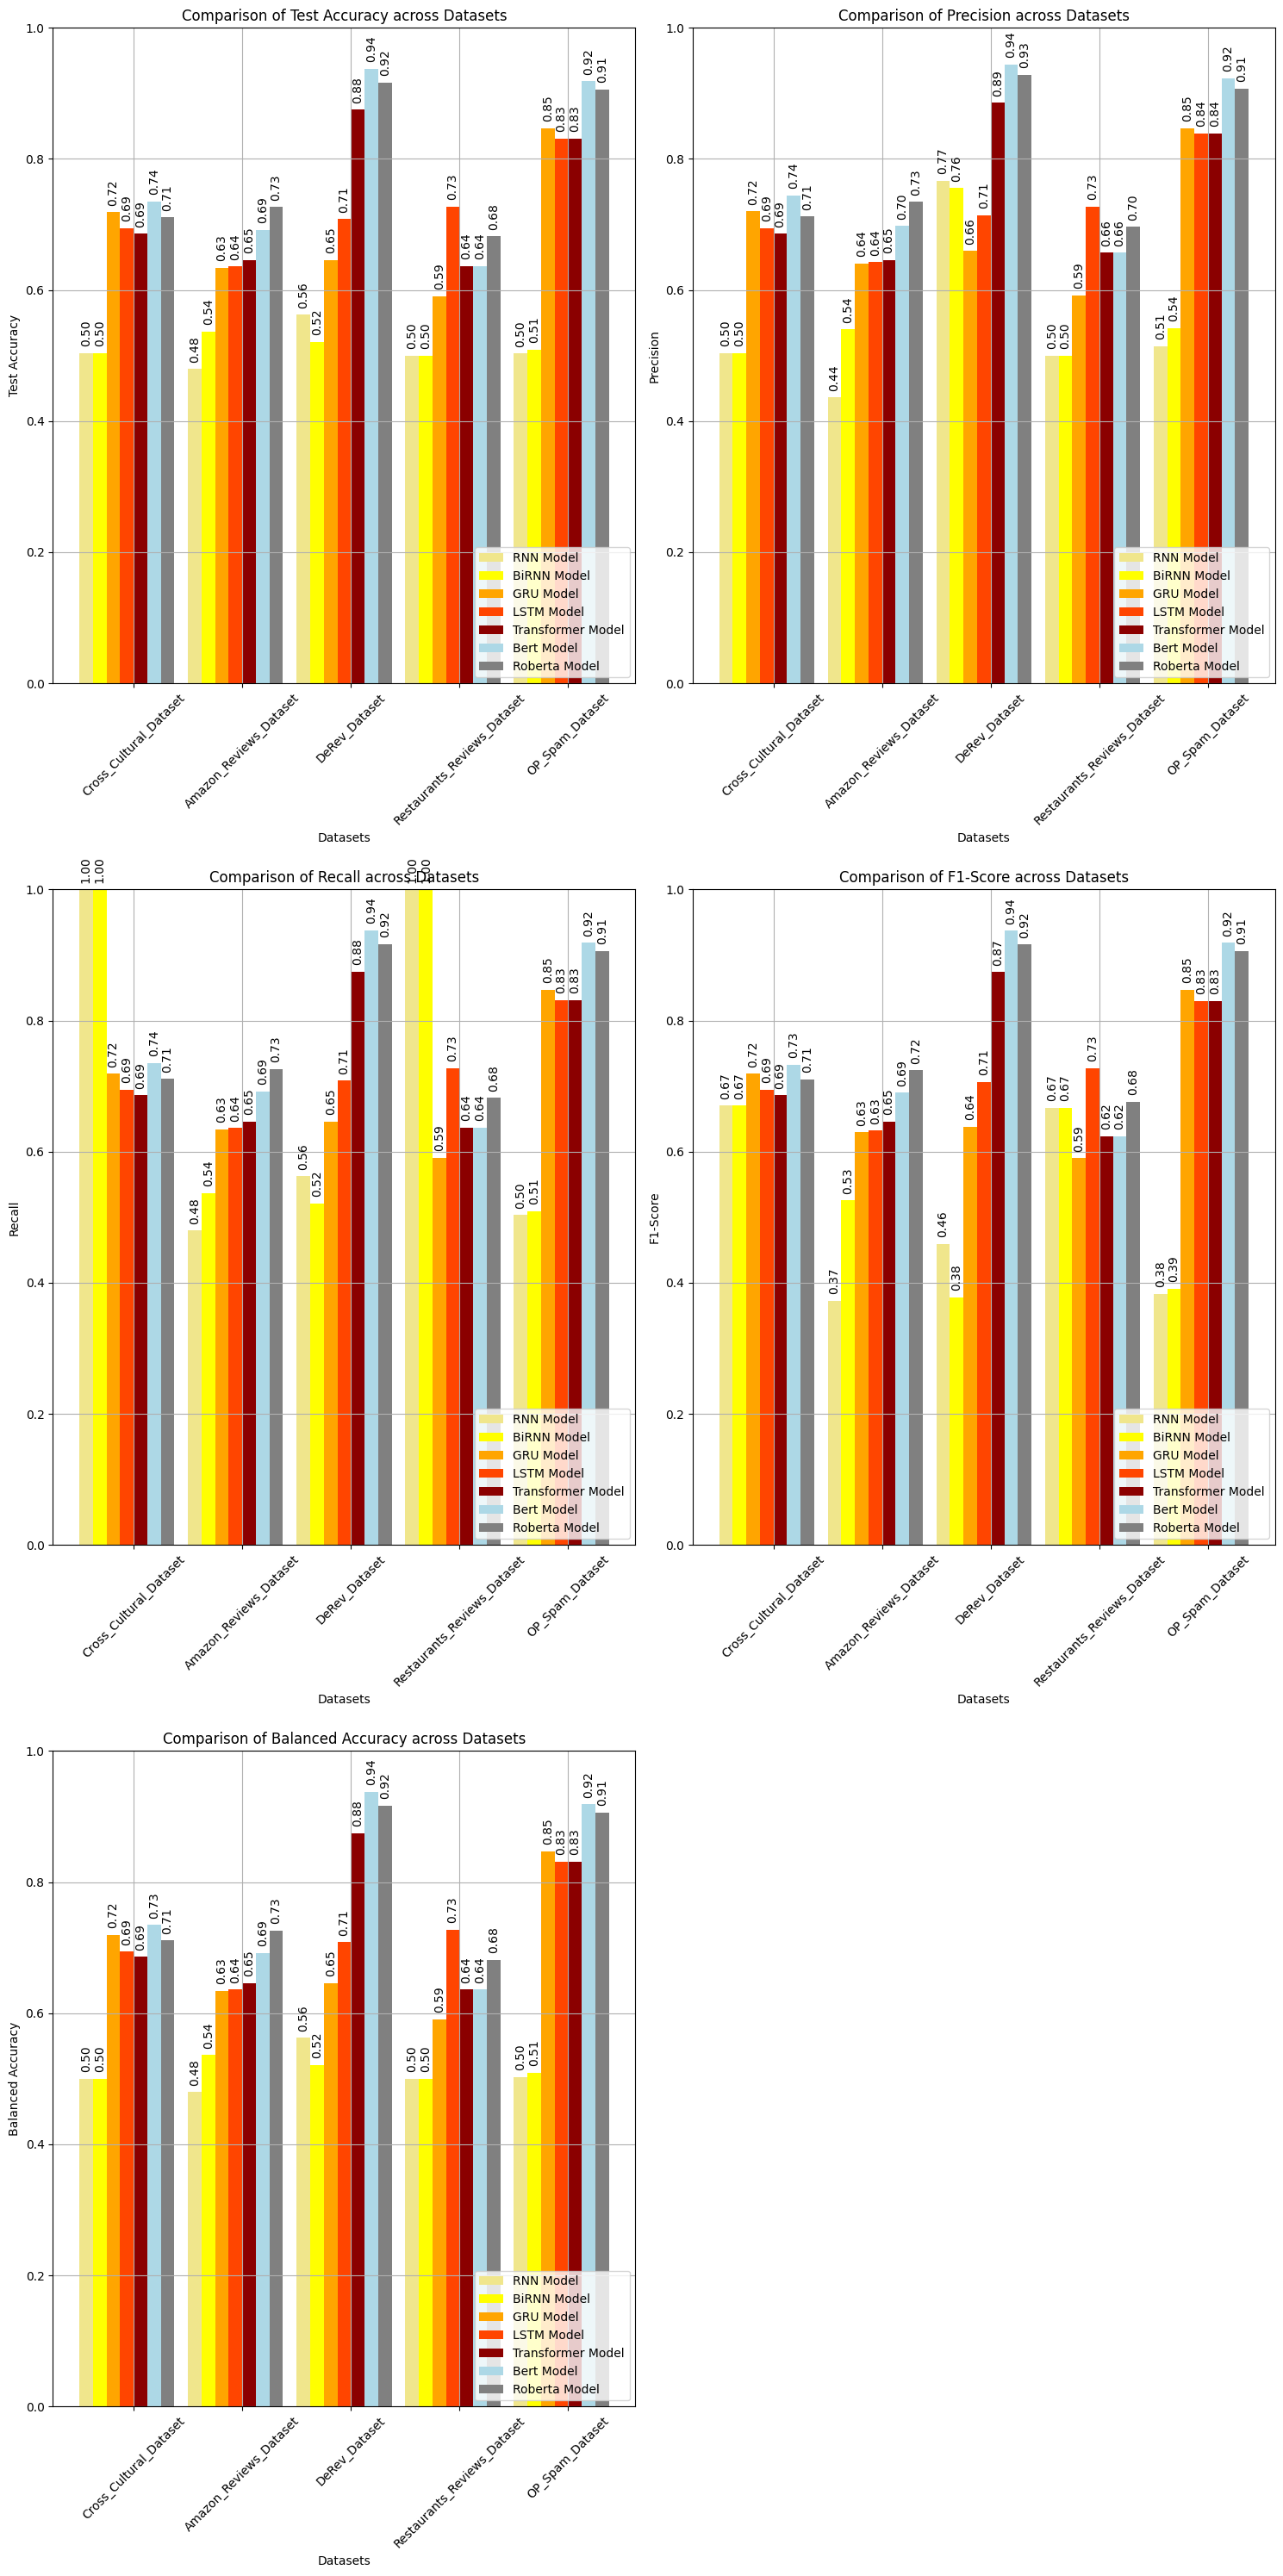

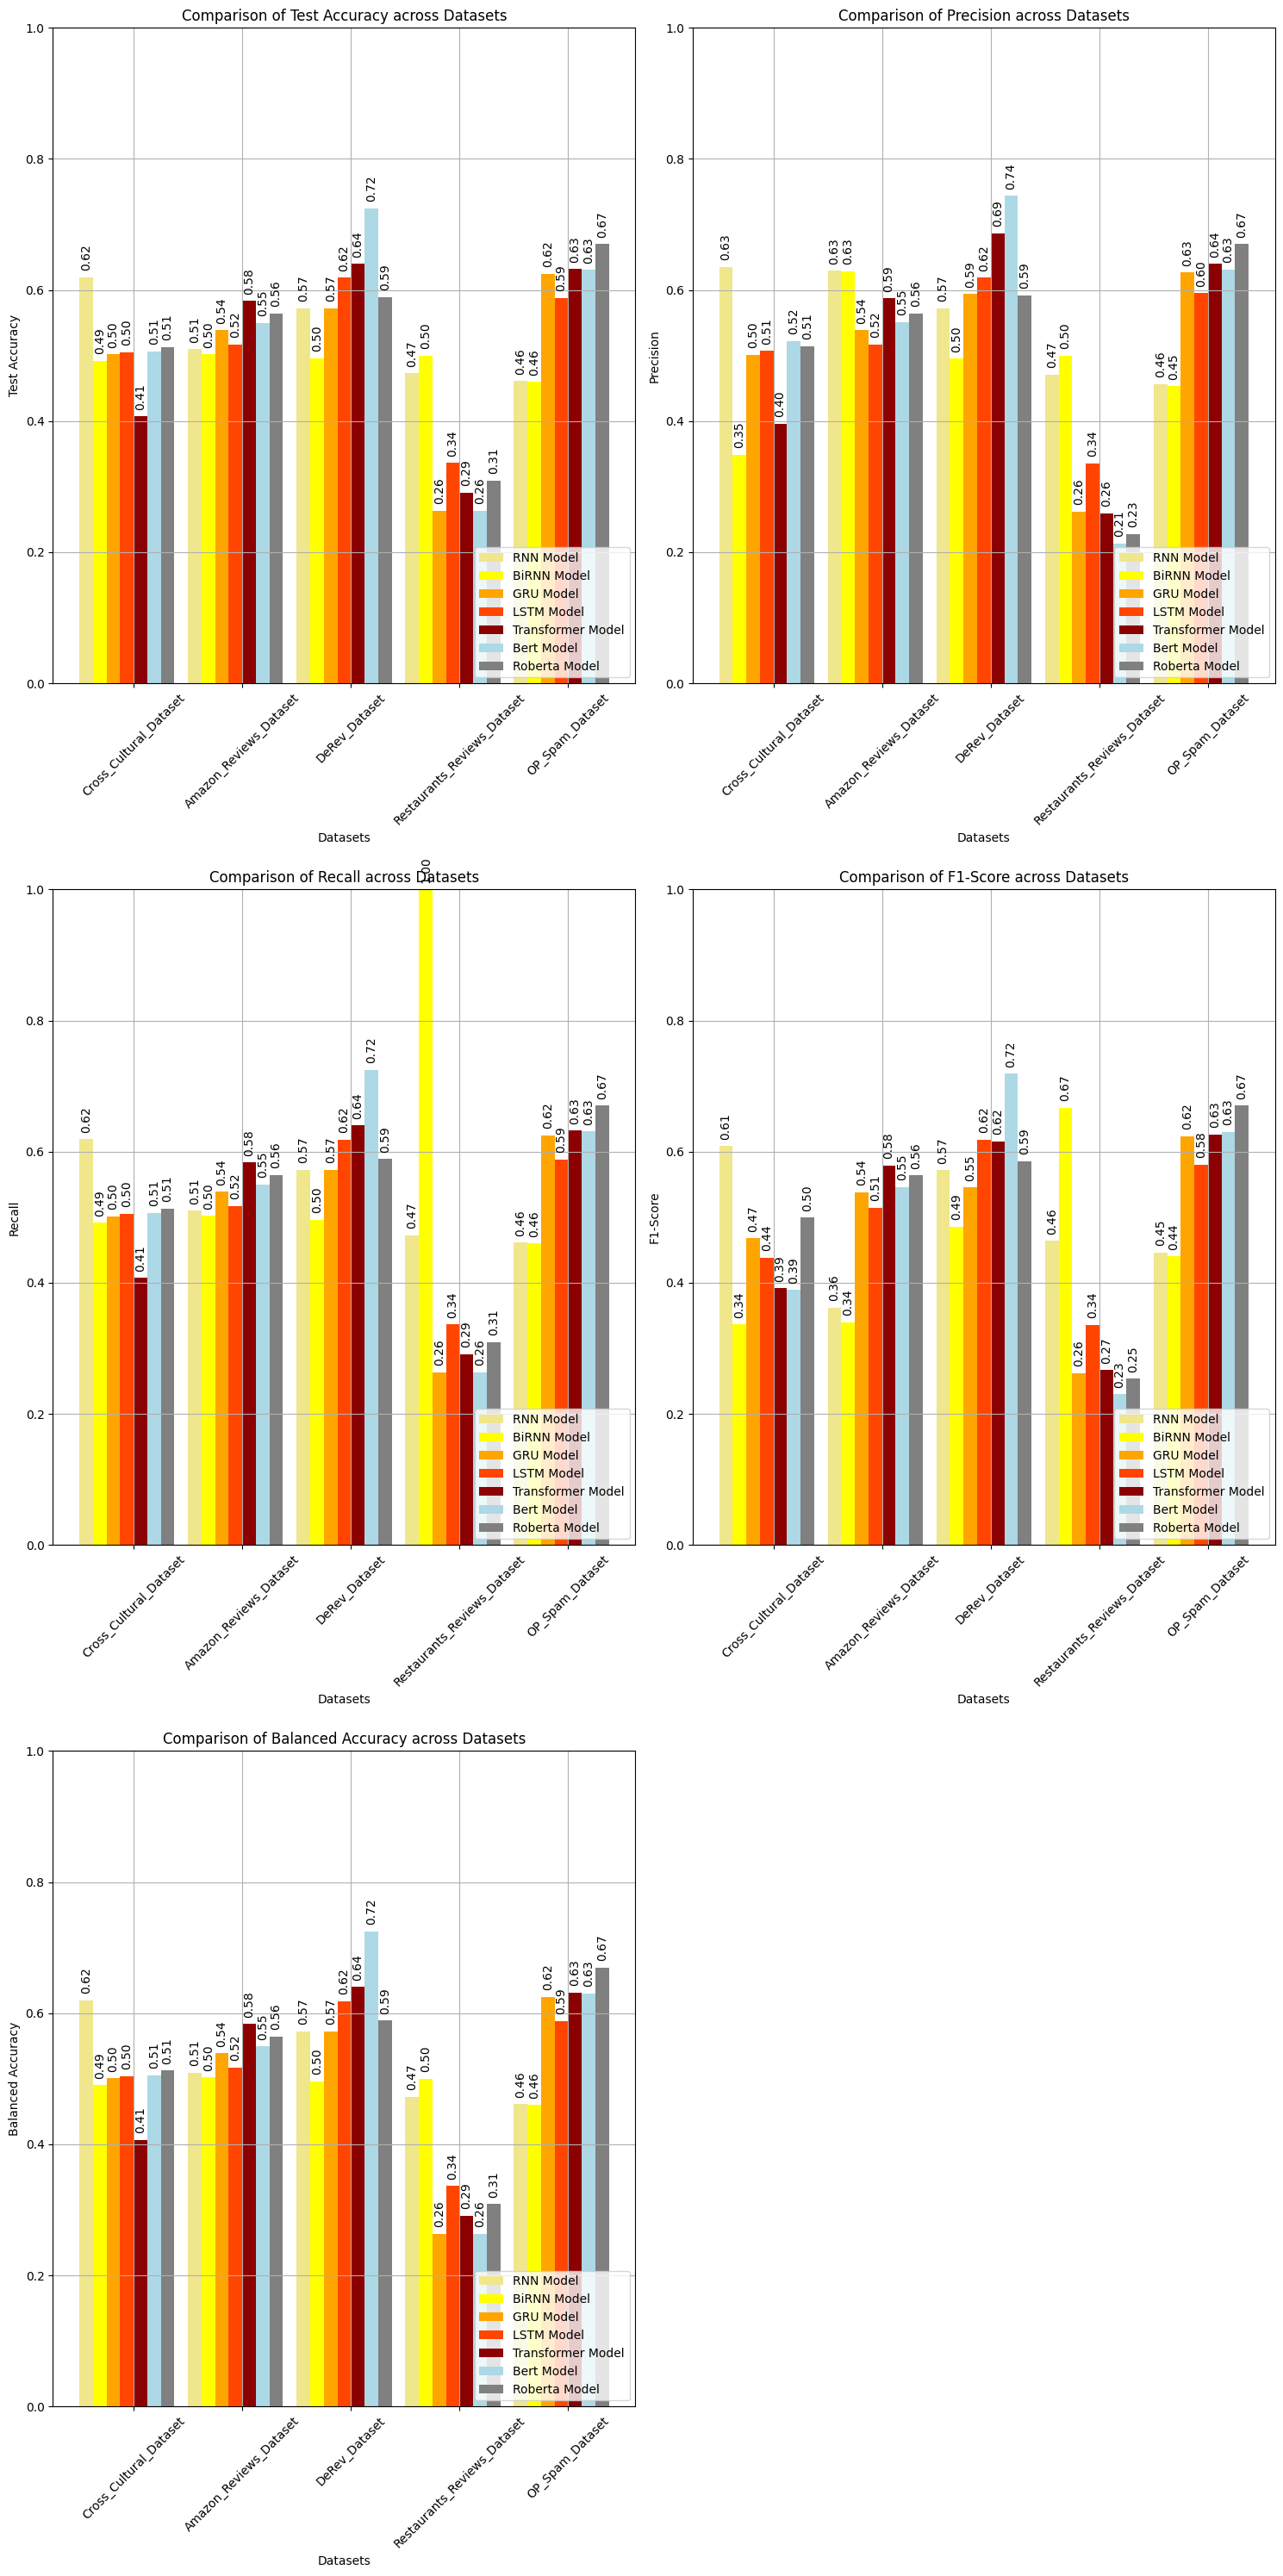

In [8]:
# Plot all results
plot_comparison_grid(df_in, metrics_order, 'in_all_diagrams')
plot_comparison_grid(df_cross, metrics_order, 'cross_all_diagrams')


### Plot mean values

<ipython-input-9-fe77c0124e53>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df_in = df_in.groupby('Model')[metrics_order].mean().reset_index()
<ipython-input-9-fe77c0124e53>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df_cross = df_cross.groupby('Model')[metrics_order].mean().reset_index()


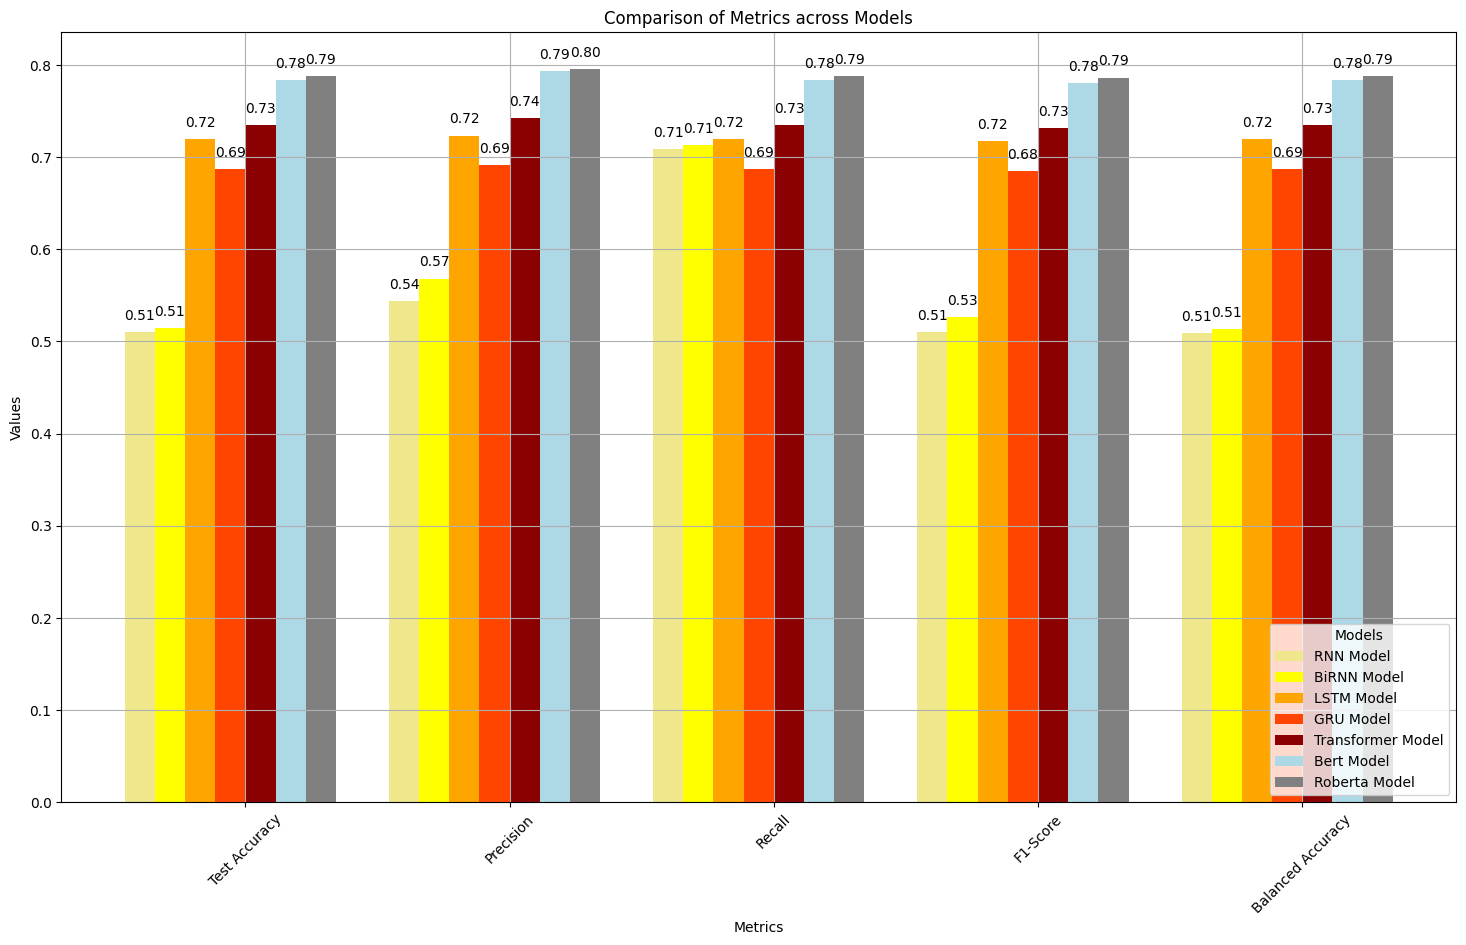

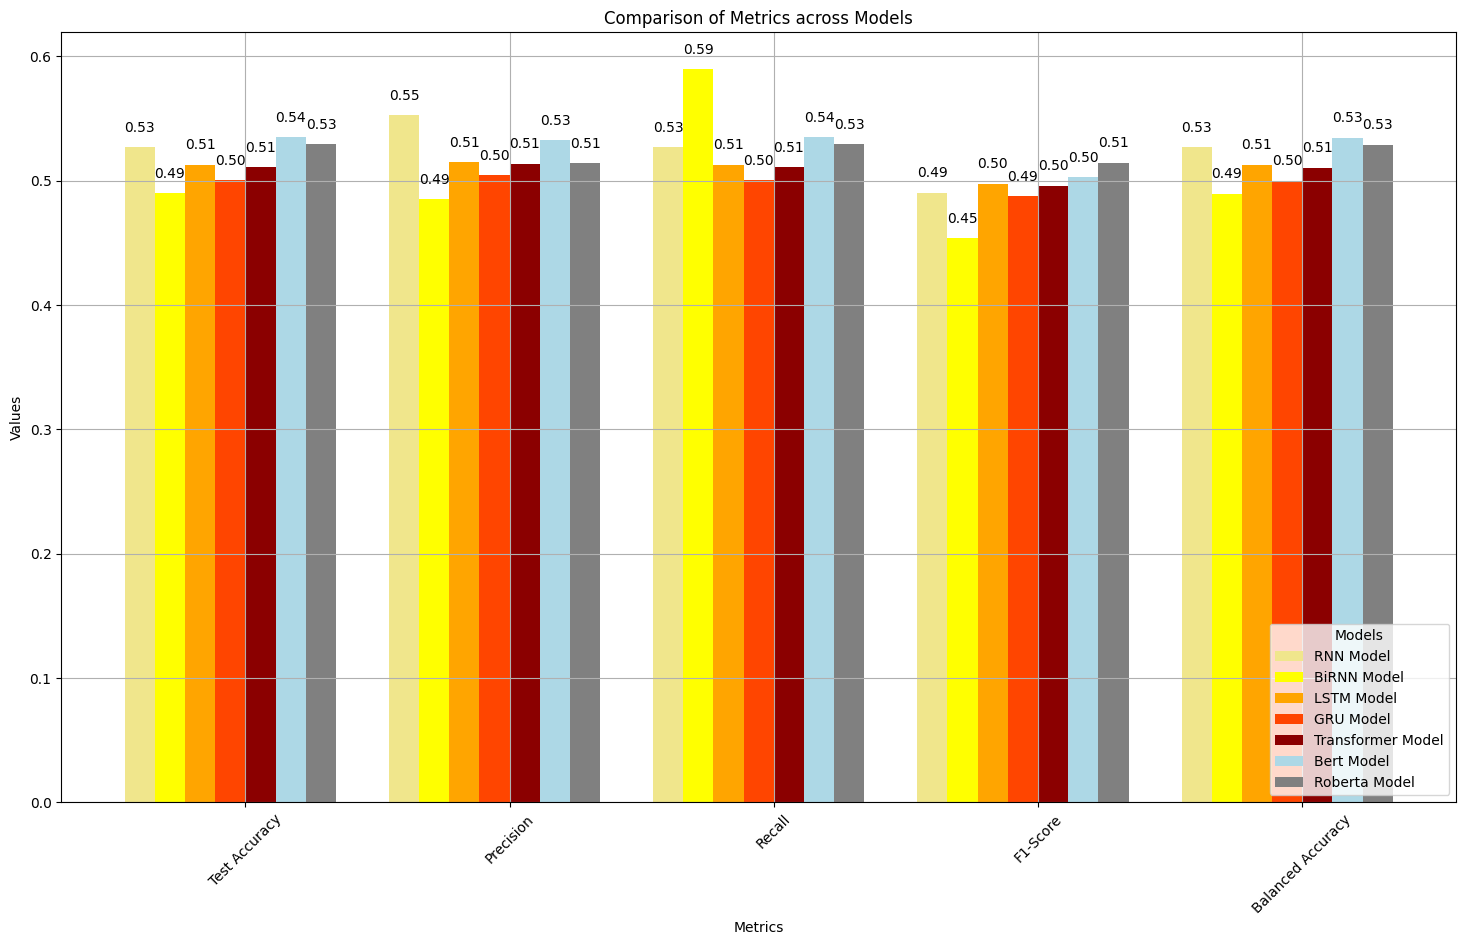

In [9]:
# Get mean values
mean_df_in = df_in.groupby('Model')[metrics_order].mean().reset_index()
mean_df_cross = df_cross.groupby('Model')[metrics_order].mean().reset_index()

# Plot mean results
plot_comparison_single(mean_df_in, 'in_metrics')
plot_comparison_single(mean_df_cross, 'cross_metrics')